In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [16]:
x = torch.randn(20, 10)
y = torch.randint(0, 2, (20, 1) ).type(torch.FloatTensor)


In [13]:
import torch.nn as nn

input_units = 10
output_units = 1

# model
model = nn.Sequential(nn.Linear(input_units, output_units), nn.Sigmoid())

# loss function
loss_func = nn.MSELoss()

# optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# EPOCH loop
epoch = 100
losses = []

for i in range(epoch):
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 5 == 0:
        print(i, loss.item())
    
    

0 0.2749629616737366
5 0.27252888679504395
10 0.27011674642562866
15 0.2677302658557892
20 0.2653729319572449
25 0.2630481421947479
30 0.2607591450214386
35 0.25850871205329895
40 0.25629934668540955
45 0.25413331389427185
50 0.25201231241226196
55 0.2499380111694336
60 0.24791154265403748
65 0.24593393504619598
70 0.24400576949119568
75 0.24212750792503357
80 0.2402992993593216
85 0.23852118849754333
90 0.2367928922176361
95 0.23511406779289246


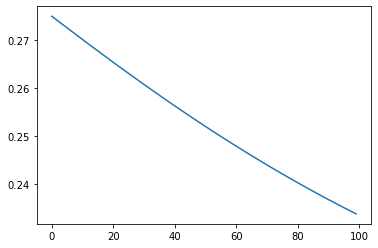

In [15]:
plt.plot(range(0, 100), losses)
plt.show()

In [27]:
# class based 
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyNeuralNet(nn.Module):
    def __init__(self, input_size, n_nodes, output_size):
        super(MyNeuralNet, self).__init__()
        self.operationOne = nn.Linear(input_size, n_nodes)
        self.operationTwo = nn.Linear(n_nodes, output_size)
    def forward(self, x):
        x = self.operationOne(x)
        x = F.relu(x)
        x = self.operationTwo(x)
        x = F.sigmoid(x)
        return x
                   
                   
                   
my_network = MyNeuralNet(input_size = 3, n_nodes = 2, output_size = 1)
my_network

MyNeuralNet(
  (operationOne): Linear(in_features=3, out_features=2, bias=True)
  (operationTwo): Linear(in_features=2, out_features=1, bias=True)
)

In [42]:
import glob

!ls ../Data/Train_Data/
p = '../Data/Train_Data'

dog_files = [f for f in glob.glob('../Data/Train_Data/dog/*.jpg')]
cat_files = [f for f in glob.glob('../Data/Train_Data/cat/*.jpg')]
files = dog_files + cat_files
print(f'Total no of images {len(files)}')
no_of_images = len(files)


cat dog
Total no of images 1399


In [43]:
no_of_images

1399

In [47]:
import numpy as np
shuffle = np.random.permutation(no_of_images)
shuffle

array([ 827,  488,  698, ...,  725, 1312,  953])

In [51]:
import os
path = p
os.mkdir(os.path.join(path,'train'))
os.mkdir(os.path.join(path,'valid'))
#Create directories with label names.
for t in ['train','valid']:
    for folder in ['dog/','cat/']:
         os.mkdir(os.path.join(path,t,folder))

In [56]:
# copy images to valid folder
for i in shuffle[:250]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))



['../Data/Train_Data/dog/dog.1035.jpg',
 '../Data/Train_Data/dog/dog.1021.jpg',
 '../Data/Train_Data/dog/dog.1009.jpg',
 '../Data/Train_Data/dog/dog.211.jpg',
 '../Data/Train_Data/dog/dog.205.jpg',
 '../Data/Train_Data/dog/dog.239.jpg',
 '../Data/Train_Data/dog/dog.365.jpg',
 '../Data/Train_Data/dog/dog.403.jpg',
 '../Data/Train_Data/dog/dog.417.jpg',
 '../Data/Train_Data/dog/dog.371.jpg',
 '../Data/Train_Data/dog/dog.359.jpg',
 '../Data/Train_Data/dog/dog.167.jpg',
 '../Data/Train_Data/dog/dog.1141.jpg',
 '../Data/Train_Data/dog/dog.1155.jpg',
 '../Data/Train_Data/dog/dog.173.jpg',
 '../Data/Train_Data/dog/dog.36.jpg',
 '../Data/Train_Data/dog/dog.1169.jpg',
 '../Data/Train_Data/dog/dog.22.jpg',
 '../Data/Train_Data/dog/dog.1182.jpg',
 '../Data/Train_Data/dog/dog.1196.jpg',
 '../Data/Train_Data/dog/dog.198.jpg',
 '../Data/Train_Data/dog/dog.199.jpg',
 '../Data/Train_Data/dog/dog.1197.jpg',
 '../Data/Train_Data/dog/dog.1183.jpg',
 '../Data/Train_Data/dog/dog.1168.jpg',
 '../Data/Train_

In [57]:
# copy images to train folder
for i in shuffle[250:]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'train',folder,image))

In [58]:
# pick random images
for i in shuffle[:250]:
    folder = files[i].split('/')[-2].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))


FileNotFoundError: [Errno 2] No such file or directory: '../Data/Train_Data/cat/cat.360.jpg' -> '../Data/Train_Data/valid/cat/cat.360.jpg'

In [65]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.12, 0.11, 0.40], [0.89, 0.21, 0.12])])
train = ImageFolder('../Data/Train_Data/train/',transform)
valid = ImageFolder('../Data/Train_Data/valid/',transform)

In [67]:
train.class_to_idx

{'cat': 0, 'dog': 1}

In [68]:
# tensor to image function
import matplotlib.pyplot as plt
def imshow(inp):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.12, 0.12, 0.40])
    std = np.array([0.22, 0.20, 0.20])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp) 

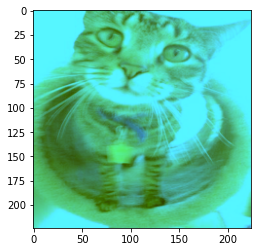

In [69]:
imshow(train[30][0])

In [70]:
# data loader
train_data_generator = torch.utils.data.DataLoader(train,shuffle=True,batch_size=64,num_workers=8)
valid_data_generator = torch.utils.data.DataLoader(valid,batch_size=64,num_workers=8)